In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2
%matplotlib inline

In [56]:
# ...existing code...
img = cv2.imread("./pictures/Rajkumar Rao/download (3).jpg")
print(img.shape)  # (height, width, channels)
# ...existing code...

(275, 183, 3)


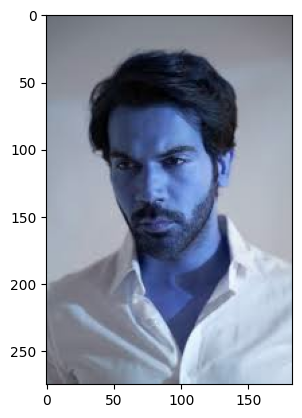

In [57]:
plt.imshow(img)

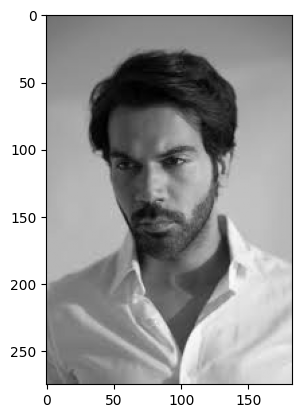

In [58]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [59]:
face_cascade=cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
faces=face_cascade.detectMultiScale(gray,1.1,3)
faces

array([[ 31,  70, 103, 103]], dtype=int32)

In [60]:
x,y,w,h=faces[0]

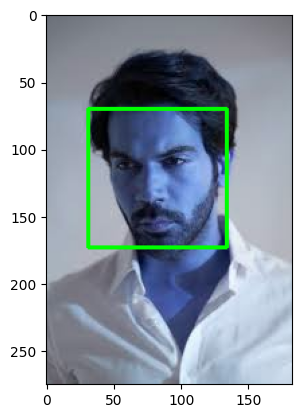

In [61]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(face_img)

In [62]:
eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")
if eye_cascade.empty():
    print("Error: Eye cascade file not loaded. Check the file path.")
else:
    eyes=eye_cascade.detectMultiScale(gray,1.1,3)
    print(eyes)
    # ...your detection code...

[[ 78  97  27  27]
 [ 47 102  23  23]]


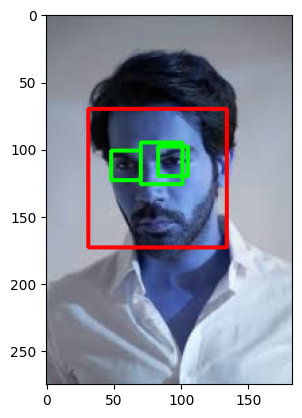

In [63]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]   
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

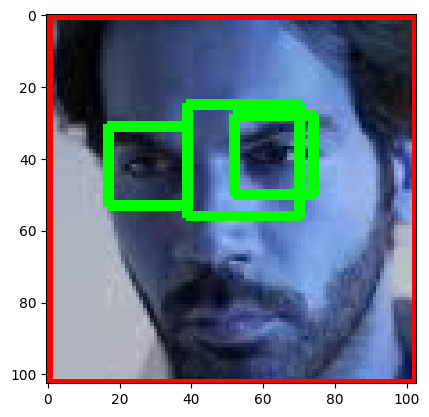

In [64]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [65]:
def croped_face(address):
    img=cv2.imread(address)
    print(address)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face_cascade=cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
    faces=face_cascade.detectMultiScale(gray,1.3,3)
    for (x,y,w,h) in faces:
        roi_color=img[y:y+h,x:x+w]
        if len(eyes)>2:
            return roi_color

In [66]:
croped_face("./pictures/Hrithik Roshan\download (5).jpg")

./pictures/Hrithik Roshan\download (5).jpg


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\adity\AppData\Local\Temp\ipykernel_19260\2387241234.py:1: SyntaxWarning: invalid escape sequence '\d'
  croped_face("./pictures/Hrithik Roshan\download (5).jpg")


array([[[ 22,  20,  20],
        [ 24,  22,  22],
        [ 23,  21,  21],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [131, 131, 131]],

       [[ 12,  10,  10],
        [ 13,  11,  11],
        [ 17,  15,  15],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [131, 131, 131]],

       [[ 11,   9,   9],
        [ 12,  10,  10],
        [  7,   5,   5],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [131, 131, 131]],

       ...,

       [[ 80, 114, 157],
        [ 82, 116, 159],
        [104, 139, 183],
        ...,
        [152, 152, 152],
        [152, 152, 152],
        [152, 152, 152]],

       [[ 85, 119, 162],
        [ 86, 121, 165],
        [ 99, 134, 178],
        ...,
        [153, 153, 153],
        [153, 153, 153],
        [153, 153, 153]],

       [[ 86, 121, 165],
        [ 89, 124, 168],
        [100, 135, 179],
        ...,
        [153, 153, 153],
        [153, 153, 153],
        [153, 153, 153]]

In [67]:
croped_face(".\pictures\Rajnikanth\download.jpg")

.\pictures\Rajnikanth\download.jpg


<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\adity\AppData\Local\Temp\ipykernel_19260\1461799295.py:1: SyntaxWarning: invalid escape sequence '\p'
  croped_face(".\pictures\Rajnikanth\download.jpg")


array([[[151, 177, 201],
        [129, 153, 177],
        [ 90, 113, 135],
        ...,
        [172, 198, 214],
        [199, 232, 247],
        [216, 255, 255]],

       [[148, 177, 204],
        [ 95, 120, 146],
        [ 85, 108, 130],
        ...,
        [142, 167, 183],
        [195, 225, 242],
        [203, 240, 254]],

       [[102, 132, 161],
        [ 76, 103, 130],
        [113, 137, 161],
        ...,
        [ 43,  66,  82],
        [181, 209, 226],
        [209, 245, 255]],

       ...,

       [[122,  83,  51],
        [136,  96,  61],
        [144, 105,  67],
        ...,
        [207, 164, 125],
        [224, 185, 141],
        [193, 154, 109]],

       [[162, 121,  88],
        [163, 121,  86],
        [157, 115,  78],
        ...,
        [228, 188, 153],
        [229, 190, 151],
        [184, 147, 103]],

       [[173, 131,  96],
        [162, 120,  83],
        [169, 128,  89],
        ...,
        [224, 186, 152],
        [219, 181, 146],
        [207, 171, 131]]

In [68]:
path_to_dataset = "./pictures/"
path_to_cropped = "./pictures/cropped_faces/"

In [69]:
import os
img_dir=[]
for i in os.scandir(path_to_dataset):
    if i.is_dir():
        img_dir.append(i.path)

In [70]:
img_dir

['./pictures/Aamir Khan',
 './pictures/Akshay Kumar',
 './pictures/Amitabh Bachchan',
 './pictures/Ayushman Khurana',
 './pictures/Hrithik Roshan',
 './pictures/Rajkumar Rao',
 './pictures/Rajnikanth',
 './pictures/Salman Khan',
 './pictures/Shahid Kapoor',
 './pictures/Shahrukh Khan']

In [71]:
import shutil
if os.path.exists(path_to_cropped):
    shutil.rmtree(path_to_cropped)
os.makedirs(path_to_cropped)

In [72]:
cropped_img_dir = []
celebrity_names = []
celebrity_file_name=dict()

for i in img_dir:
    count=1
    celebrity=i.split('/')[-1]
    celebrity_names.append(celebrity)
    celebrity_file_name[celebrity]=[]
    print(celebrity)
    for j in os.scandir(i):
        roi_color=croped_face(j.path)
        if roi_color is not None:
            croped_folder=path_to_cropped + celebrity
            if not os.path.exists(croped_folder):
                os.makedirs(croped_folder)
                cropped_img_dir.append(croped_folder)
                print("generating folder for", celebrity)
                
            cropped_file_name=celebrity+str(count)+".png"
            cropped_file_path=croped_folder+ "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name[celebrity].append(cropped_file_path)
            count+=1
            
                

Aamir Khan
./pictures/Aamir Khan\download (1).jpeg
generating folder for Aamir Khan
./pictures/Aamir Khan\download (2).jpeg
./pictures/Aamir Khan\download (3).jpeg
./pictures/Aamir Khan\download (4).jpeg
./pictures/Aamir Khan\download.jpeg
./pictures/Aamir Khan\images (1).jpeg
./pictures/Aamir Khan\images.jpeg
Akshay Kumar
./pictures/Akshay Kumar\download.jpg
generating folder for Akshay Kumar
./pictures/Akshay Kumar\images (1).jpg
./pictures/Akshay Kumar\images (2).jpg
./pictures/Akshay Kumar\images (3).jpg
./pictures/Akshay Kumar\images (4).jpg
Amitabh Bachchan
./pictures/Amitabh Bachchan\download (3).jpg
generating folder for Amitabh Bachchan
./pictures/Amitabh Bachchan\download (4).jpg
./pictures/Amitabh Bachchan\download (5).jpg
./pictures/Amitabh Bachchan\download (6).jpg
./pictures/Amitabh Bachchan\images (3).jpg
./pictures/Amitabh Bachchan\images (4).jpg
./pictures/Amitabh Bachchan\images (5).jpg
./pictures/Amitabh Bachchan\MV5BNTk1OTUxMzIzMV5BMl5BanBnXkFtZTcwMzMxMjI0Nw@@._V1_.